In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
    

### KNN Regression으로 50cm 생선의 무게를 예측

In [2]:
# Data
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### Train, Test 분리

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_input, test_input, train_target, test_target = train_test_split(fish_length, fish_weight, random_state=42)

In [5]:
# 1row 구성된 배열로 재구성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

### KNN Regression Model 

In [6]:
from sklearn.neighbors import KNeighborsRegressor
# 아까 했었을때 이웃의 갯수가 3이 가장 좋았으므로 3으로 생성
knr = KNeighborsRegressor(n_neighbors=3)

In [9]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [12]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[150]])

array([1033.33333333])

In [13]:
knr.predict([[550]])

array([1033.33333333])

In [14]:
# 잘못된거 같은데? 기존 데이터로 넣어서 확인해보자
for i, v in list(enumerate(train_target)):
    if v == train_target.max():
        print(train_input[i], v)

[43.] 1100.0
[42.] 1100.0


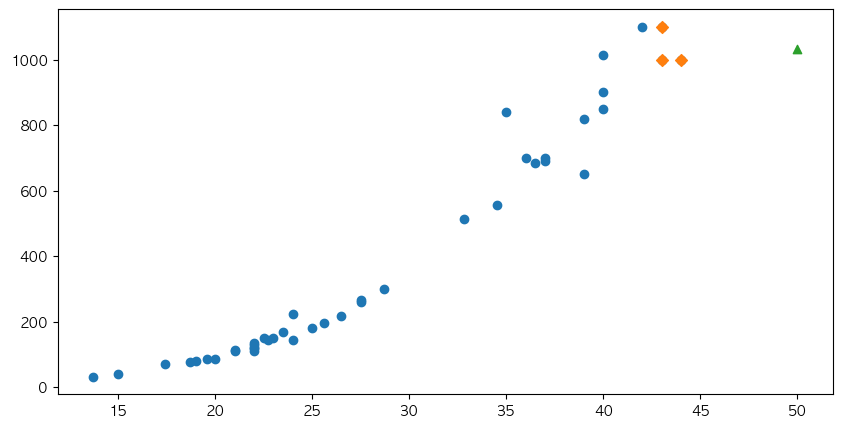

In [17]:
# 산점도를 그려서 눈으로 확인해 보자
# 50cm 생선의 이웃을 구하자
distance, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

#이웃 샘플만 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 생선 데이터
plt.scatter(50, 1033.333, marker='^')

plt.show()

이런걸 구할때는 KNN은 사용하면 안됨, 범위 안에서의 데이터는 잘 구하는데 범위를 벗어나는 값은 구하지 못함
주황색 값의 평균값으로 찍어준거라 

In [18]:
# 이웃들의 평균값을 함 봐보자
np.mean(train_target[indexes])

1033.3333333333333

오 ㄹㅇ 진짜 저 값이네 
그런 값을 구할때 필요한게 선형회귀식 임

---
### 선형회귀 (Linear Regression)
: 직선이나 곡선의 함수식(방정식)을 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [21]:
lr.predict([[50]])

array([1241.83860323])

In [23]:
# Y=aX + b 에서 기울기와 절편값을 출력 (Deep Learning 에서는 Weight와 Bias라고 불림)
print(lr.coef_, lr.intercept_) 
# 앞에꺼가 기울기 , 뒤에꺼가 절편값

[39.01714496] -709.0186449535474


In [24]:
# 기울기와 절편값으로 계산

39.01714496 *50 - 709.0186449535474

1241.8386030464528

### 산점도 그려보기

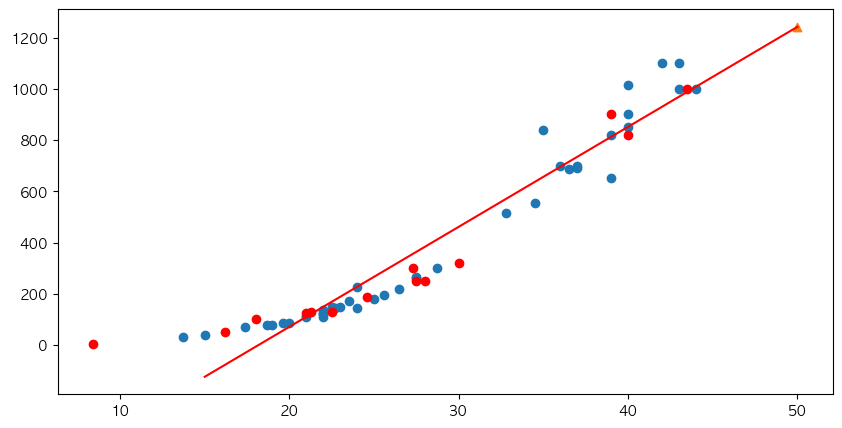

In [31]:
# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target, c='red')

# 15에서 50까지 1차 방정식 그래프를  그려보자
plt.plot(
    [15,50],
    [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_,],
    c = 'red'
)

# 50cm 생선
plt.scatter(50,1241.8386030464528, marker='^')

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수일 경우가 발생할 수 있다 ( 절편이 음수)

### 과대적합과 과소적합 확인

In [30]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


약 9% 정도의 과대적합이 확인
이를 해결하자 어떻게?
지금 column은 lentgh와 weight 밖에 없음, 이럴때 특성공학 을 이용하여 column을 늘려야함 (미분?)


---
### 다항 회귀 (다중이랑 다른거임 )
Y = $a X^2 $ + bX + C     
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개 인 회귀는 다중회귀 라고 한다.


In [32]:
# Feature를 제공한 Column을 생성하여 기존의 Column에 붙인다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [33]:
print(train_poly.shape , test_poly.shape)

(42, 2) (14, 2)


In [34]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [38]:
# 50cm 생선
lr.predict([[50**2, 50]])

array([1573.98423528])

In [39]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


### 산점도 그리기

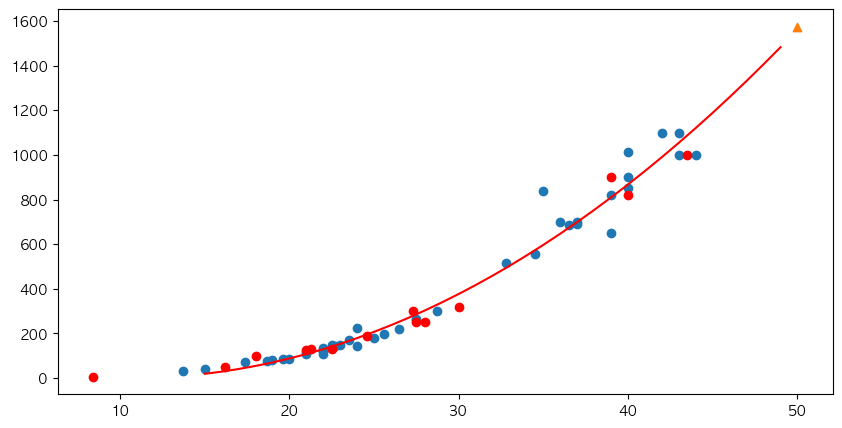

In [40]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만든다
point = np.arange(15,50)

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target, c='red')

# 15에서 50까지 1차 방정식 그래프를  그려보자
plt.plot(point,1.01*point**2 - 21.6 * point+ 116,c = 'red')

# 50cm 생선
plt.scatter(50,1573.98, marker='^')

plt.show()

In [41]:
# 과대적합 과 과소적합 확인

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


> 약간의 과소적합이 발생하지만 단순회귀 보다는 다항회귀가 진전이 있었다